Localise minor planet tracklets in 128x128 composite difference images using the Darknet implementation of YOLOv4 via Google Colab.

Assuming the existance of directories yolov4 and yolov4/training google drive. Images with tracklets have been annotated with bounding box data in the form required by YOLO. Data structured as follows (as required by YOLO):
* All images and their corresponding annotations are in the "obj" directory (my drive -> yolov4/obj/). 
* obj.names files contains the class/ object name (only 1 - "mp")
* obj.data contains file paths required
* yolov4-mp-custom_version.cfg is the customised configuration file

More info: https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects 

Good tutorials: (1) https://blog.roboflow.com/training-yolov4-on-a-custom-dataset/ 
(2) https://medium.com/analytics-vidhya/train-a-custom-yolov4-object-detector-using-google-colab-61a659d4868

In [1]:
# GPU assigned
!nvidia-smi

Sun Feb 20 06:33:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/
%rm -rf darknet

In [4]:
#Clone darknet git repository onto the Colab VM
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 24.58 MiB/s, done.
Resolving deltas: 100% (10352/10352), done.


In [ ]:
# mount drive 
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# symbolic link so that /content/gdrive/My\ Drive/ equals /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list contents to test setup
!ls /mydrive/GoogleColab/yolov4

In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1
# (repeat on disconnect)

%cd content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make
!chmod +x ./darknet

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/GoogleColab/yolov4/obj.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

In [9]:
# copy the obj.names, obj.data, and train/valid/test files into the /darknet/data/ folder
!cp /mydrive/GoogleColab/yolov4/data/obj.names ./data
!cp /mydrive/GoogleColab/yolov4/obj.data  ./data
!cp /mydrive/GoogleColab/yolov4/data/train.txt ./data
!cp /mydrive/GoogleColab/yolov4/data/test.txt  ./data

In [10]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/GoogleColab/yolov4/yolov4-mp-custom_v1.cfg ./cfg

In [ ]:
# Download the yolov4 pre-trained weights file (optional)
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
%cd /content/darknet/

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov4-mp-custom_v1.cfg yolov4.conv.137 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.657342), count: 6, class_loss = 1.208112, iou_loss = 0.536339, total_loss = 1.744451 
 total_bbox = 382947, rewritten_bbox = 0.020368 % 
]2;2142/6000: loss=0.9 hours left=7.1
 2142: 0.942289, 1.470036 avg loss, 0.001000 rate, 9.444913 seconds, 68544 images, 7.128242 hours left
Loaded: 0.000079 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000015, iou_loss = 0.000000, total_loss = 0.000015 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.798137), count: 3, class_loss = 0.332267, iou_loss = 1.341111, total_loss = 1.673378 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.813086), count: 5, class_loss = 0.566912, iou_loss = 0.332920, total_loss = 0.899832 
 total_bbox = 382955, rewritten_bbox = 0.020368 % 
v3 

In [13]:
# to restart training in the colab environment dies -> load last saved weights and restart
!./darknet detector train data/obj.data cfg/yolov4-mp-custom_v1.cfg /mydrive/GoogleColab/yolov4/training/yolov4-mp-custom_v1_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 652003, rewritten_bbox = 0.035276 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000571, iou_loss = 0.000000, total_loss = 0.000571 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.745185), count: 3, class_loss = 0.746920, iou_loss = 0.537865, total_loss = 1.284785 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.798206), count: 4, class_loss = 0.086329, iou_loss = 0.419409, total_loss = 0.505738 
 total_bbox = 652010, rewritten_bbox = 0.035276 % 

 Tensor Cores are used.
]2;5867/6000: loss=1.7 hours left=0.2
 5867: 1.696442, 1.369255 avg loss, 0.000010 rate, 2.969439 seconds, 187744 images, 0.207991 hours left
Loaded: 0.000068 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.940692), count: 2, class_loss = 0.262954, iou_loss = 4.092315, 

In [15]:
#Check the mAP for the best weights

!./darknet detector map data/obj.data cfg/yolov4-mp-custom_v1.cfg /mydrive/GoogleColab/yolov4/training/yolov4-mp-custom_v1_final.weights -points 0


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
    
# helper function to display prediction
def imShow(path):
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

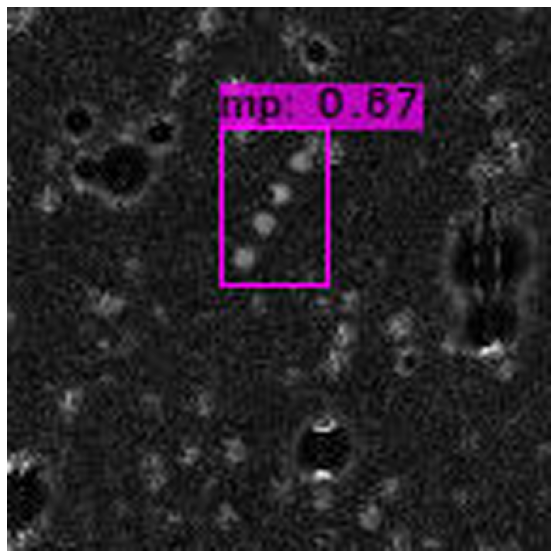

In [18]:
!./darknet detector test data/obj.data cfg/yolov4-mp-custom_v1.cfg /mydrive/GoogleColab/yolov4/training/yolov4-mp-custom_v1_final.weights /mydrive/GoogleColab/yolov4/data/2456062_384_1920.jpg -dont-show -thresh 0.1
imShow('/content/darknet/predictions.jpg')
#imShow('predictions.jpg')